In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np
import seaborn as sns

In [9]:
employers_clean_path = "employers_clean.csv"
union_data_path = "union_data.csv"

In [10]:
employers_clean_path = pd.read_csv(employers_clean_path)
union_data_path = pd.read_csv(union_data_path)

In [11]:
data_df = pd.merge(union_data_path, employers_clean_path,  how='right', on='Country')
data_df.head()

# Display the data table for preview

data_df = data_df[['RANK', 'NAME', 'TICKER', 'INDUSTRIES', 
                               'Country', 'EMPLOYEES', 'City', 'Glassdoor Rating', 'obs_value']]

data_df.head()

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,City,Glassdoor Rating,obs_value
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",Suwon,3.8,NaN
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",Redmond,4.4,10.3
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",Armonk,4.2,10.3
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",Mountain View,4.5,10.3
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",Cupertino,4.1,10.3


In [12]:
employers = data_df["RANK"].value_counts()
number_of_employers=len(employers)
number_of_employers

100

In [13]:
forbes_100 = data_df[data_df["RANK"] != 'none'].reset_index(drop=True)
forbes_100.head(100)

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,City,Glassdoor Rating,obs_value
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",Suwon,3.8,NaN
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",Redmond,4.4,10.3
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",Armonk,4.2,10.3
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",Mountain View,4.5,10.3
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",Cupertino,4.1,10.3
...,...,...,...,...,...,...,...,...,...
95,96,Mastercard,MA,Banking and Financial Services,United States,"24,000",Purchase,4.3,10.3
96,97,Electricite de France,EDF.PA,Utilities,France,"167,157",Paris,4.0,8.9
97,98,Verbund,VER.VI,Utilities,Austria,"3,184",Vienna,4.7,26.2
98,99,Panasonic,6572.T,"Engineering, Manufacturing",Japan,"240,198",Kadoma,3.8,16.8


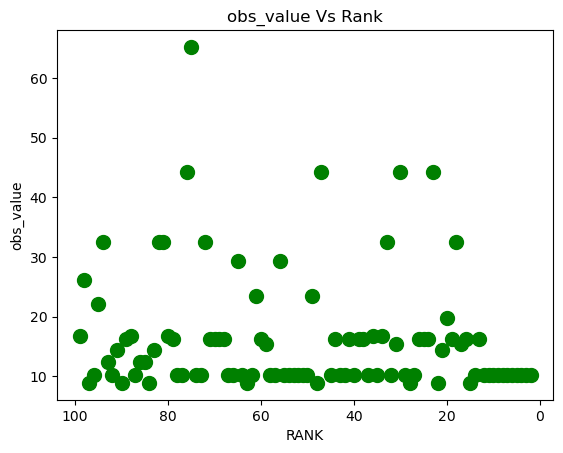

In [14]:
data_df.plot.scatter(x='RANK',y='obs_value', title='obs_value Vs Rank', s=100, c= 'green')
                     
                     
plt.gca().invert_xaxis()




In [15]:
##Correlation and Regression


In [16]:
correlation=data_df["RANK"].corr(data_df["obs_value"])
correlation

0.1425655171036854

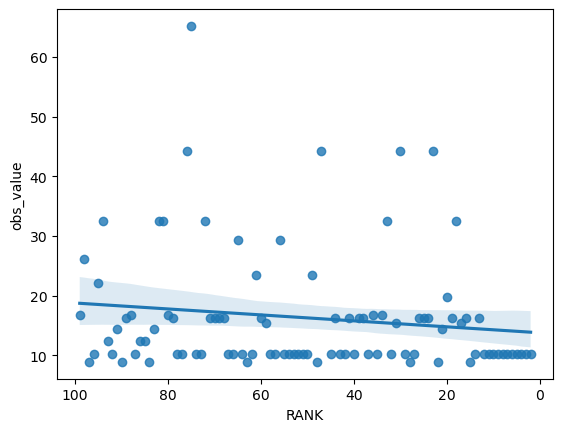

In [17]:
sns.regplot(x=data_df["RANK"], y=data_df["obs_value"])
plt.gca().invert_xaxis()

Text(0.5, 1.0, 'Country Vs obs_value')

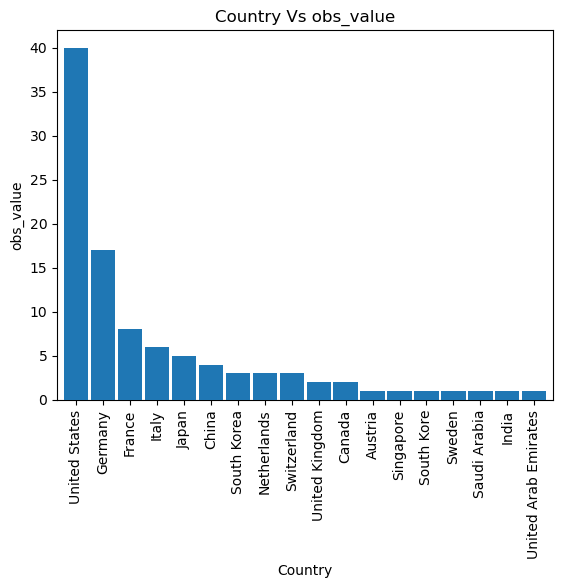

In [18]:
bar_plot = data_df['Country'].value_counts().plot.bar(width=0.9, zorder=10)

bar_plot.set_xlabel("Country")
bar_plot.set_ylabel("obs_value")
bar_plot.set_title("Country Vs obs_value")